# Cálculos de ceros de sistemas
#### https://meet.noysi.com/metodosnumericos1

## Método de Newton-Raphson

En primer lugar, vamos a resolver aproximadamente la ecuación 
$$\begin{cases} x^5+x y=1,\\ y^5+2 x y=1.\end{cases}$$

Necesitamos transformar el problema en encontrar los ceros de una función. En este caso, lo más sencillo es pasar todos los sumandos al mismo lado de la ecuación:
$$F(x,y) = ( x^5-xy-1,y^5+2xy-1).$$

In [1]:
f(x,y) = x^5 + x*y  - 1
g(x,y) = y^5 + 2*x*y - 1
F(x,y) = ( f(x,y) , g(x,y) )
show(F)

(x, y) |--> (x^5 + x*y - 1, y^5 + 2*x*y - 1)

Para aplicar el método de Newton-Raphson, es preciso considerar un punto inicial. Por ejemplo, vamos a tomar el punto $(1,1)$. Lo definimos como vector, puesto que queremos realizar operaciones con él (suma).

In [2]:
v0 = vector(RDF,[1.,1.])

También necesitamos la matriz jacobiana. En Sage se puede calcular con el método `diff` sin introducir ningún parámetro.

In [3]:
DF = F.diff()
show(DF(x,y))

[  5*x^4 + y           x]
[        2*y 5*y^4 + 2*x]

Como nuestra función de variables no está definida sobre puntos sino sobre coordenadas, para evaluar una función de varias variables en un punto hay que transformarlo en sus coordenadas. Para ello usamos el operador `*`.

In [4]:
DF(*v0) , DF(RDF(1.),RDF(1.)) , DF(v0[0],v0[1])

(
[6.0 1.0]  [6.0 1.0]  [6.0 1.0]
[2.0 7.0], [2.0 7.0], [2.0 7.0]
)

Ahora podemos aplicar el método de Newton-Raphson. Recordemos que $v_1$ está definido por
$$ J_{v_0} (v_1-v_0) = -F(v_0),$$
donde $v_0$ es el vector inicial y $J_{v_0}$ es la matriz jacobiana de $F$ evaluada en $v_0$.

Sea $x$ la solución de $$ J_{v_0} x = -F(v_0).$$
Entonces $x = v_1-v_0$, luego
$$ v_1 = v_0 + x.$$

In [5]:
v1 = v0 + DF(*v0)\(-F(*v0))

Los siguientes pasos son análogos.

In [6]:
v2 = v1 + DF(*v1)\(-F(*v1))
v3 = v2 + DF(*v2)\(-F(*v2))
puntos = [v0,v1,v2,v3]
puntos

[(1.0, 1.0),
 (0.875, 0.75),
 (0.8674615838407234, 0.5883877512370015),
 (0.8783073191378743, 0.5437936013364996)]

Por último vamos a representar las ecuaciones, la solución y las aproximaciones. Cada ecuación define en este caso una curva implícita y las soluciones serán las intersecciones de ambas curvas.

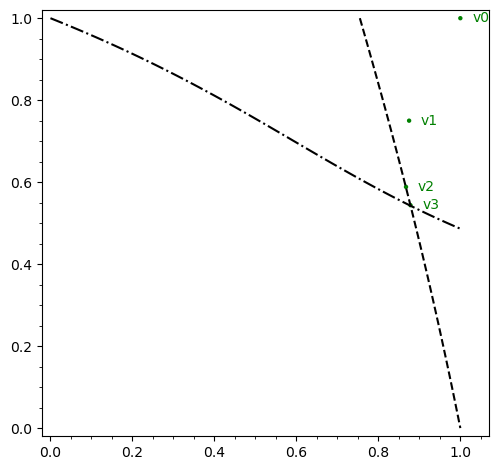

In [7]:
implicit_plot(f(x,y)==0,(x,0,1),(y,0,1),linestyle='--',color='black')\
+ implicit_plot(g(x,y)==0,(x,0,1),(y,0,1),linestyle='-.',color='black')\
+ points(puntos,color='green')\
+ sum([text('v'+str(i),puntos[i]+vector([0.05,0]),color='green') for i in range(len(puntos)) ])

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong> 
  
a. Crear una función que reciba $F$, $x_0$ y $n$ y aplique $n$ pasos de Newton-Raphson partiendo de $x_0$.
    
b. Aproximar soluciones de $e^{x+y}-x y=0$, $x^5-x-y=2$ contenidas en $[-3,3]\times [-3,3]$. 

</div>

### b)

In [9]:
F(x,y) = ( exp(x+y) - x*y , x^5 - x - y - 2 )

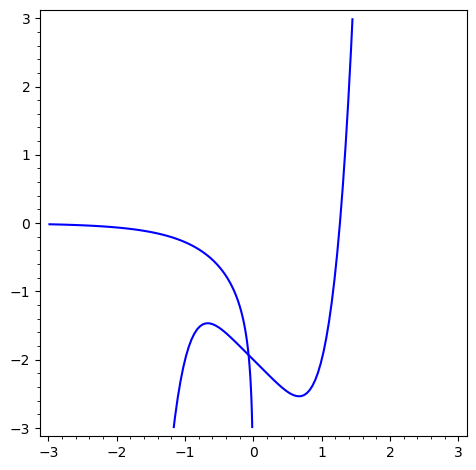

In [11]:
implicit_plot(exp(x+y) - x*y==0,(x,-3,3),(y,-3,3)) + implicit_plot(x^5 - x - y - 2==0,(x,-3,3),(y,-3,3))

In [16]:
v0 = vector(RDF,[0,-1])
DF = F.diff()
v1 = v0 + DF(*v0)\(-F(*v0))
v2 = v1 + DF(*v1)\(-F(*v1))
v3 = v2 + DF(*v2)\(-F(*v2))
puntos = [v0,v1,v2,v3]
puntos

[(0.0, -1.0),
 (0.0, -2.0),
 (-0.06766764161830635, -1.9323323583816936),
 (-0.07012308007667861, -1.9298785960798257)]

### a)

In [1]:
def NR(F,v0,n):
    vn = copy(v0)
    DF = F.diff()
    for _ in range(n):
        vn = vn + DF(*vn)\(-F(*vn))
    return vn

In [54]:
F(x,y) = ( exp(x+y) - x*y , x^5 - x - y - 2 )
v0 = vector(RDF,[0.,-1.])
NR(F,v0,3)

(-0.07012308007667861, -1.9298785960798257)

In [55]:
[NR(F,v0,n) for n in range(5)]

[(0.0, -1.0),
 (0.0, -2.0),
 (-0.06766764161830635, -1.9323323583816936),
 (-0.07012308007667861, -1.9298785960798257),
 (-0.07012631760013333, -1.9298753783190867)]

## Cálculo de extremos, tangentes, etc

El método de Newton-Raphson está diseñado para determinar los ceros de una función de $\mathbb{R}^n\to\mathbb{R}^n$, pero se puede aplicar a cualquier problema que sea equivalente. Por ejmplo, determinar el mínimo de una función de clase 1 de $\mathbb{R}^n\to\mathbb{R}$, ya que este se alcanzará en un extremo local (o en el borde) y el método de Newton-Raphson permite encontrar los ceros de la derivada y por tanto reducir el problema, bajo ciertas condiciones, a evaluar la función en un número finito de puntos. 

Por ejemplo, calculemos el máximo y el mínimo de $F(x,y)=e^{x^2+y^2}+x - 2y$ para $-1\leq x\leq 1$ y $-1\leq y\leq 1$.

Comenzaremos calculando y representando la derivada de $F$ en dicha región.

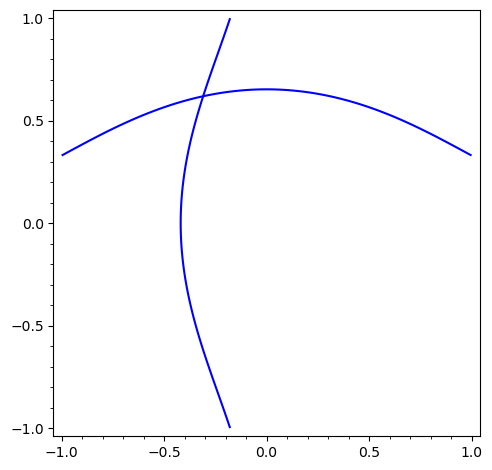

In [56]:
G(x,y) = exp(x^2+y^2)+x-2*y
F = G.diff()
implicit_plot(F(x,y)[0],(x,-1,1),(y,-1,1))+implicit_plot(F(x,y)[1],(x,-1,1),(y,-1,1))

In [57]:
plot3d(G(x,y),(x,-1,1),(y,-1,1))

Graphics3d Object

Si alguno de los extremos se alcanza en el interior, será en el punto de intersección de ambas curvas, que podemos calcular con Newton-Raphson.

In [58]:
v0 = vector(RDF,[-.3,.6])
DF = F.diff()
v1 = v0 + DF(*v0)\(-F(*v0))
v2 = v1 + DF(*v1)\(-F(*v1))
v3 = v2 + DF(*v2)\(-F(*v2))
G(*v3),v3

(0.06688023968137241, (-0.30961045795161296, 0.6192209159032259))

Ahora basta estudiar la función en los bordes y tendríamos los dos extremos:

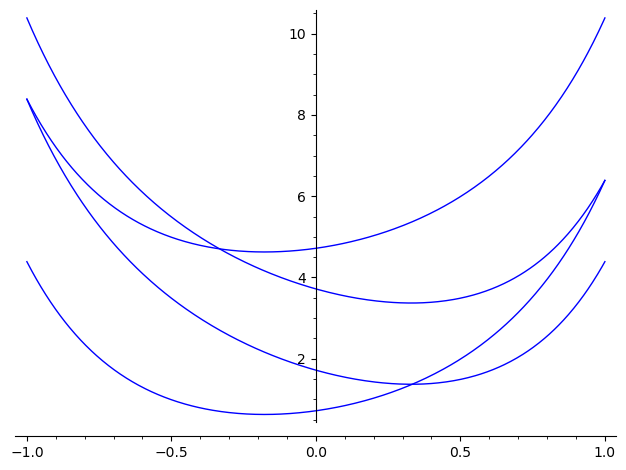

In [59]:
plot(G(-1,y),(y,-1,1))+plot(G(1,y),(y,-1,1))+plot(G(x,-1),(x,-1,1))+plot(G(x,1),(y,-1,1))

In [60]:
G(1,-1.)

10.3890560989307

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong> 
    
a. Aproximar los extremos de la función $G(x,y) = e^{x^2+y^2} +x -y$ para $-1\leq x\leq 1$ y $-1\leq y\leq 1$.

b. Aproximar el mínimo de $f(x,y)=x^4+y^4-x^3 y+x^2 y^2+x-y-1$
mediante 5 pasos del método de Newton-Raphson. Elegir un punto inicial conveniente.

c. Calcular los puntos en los que la distancia entre las gráficas de $f(x)=e^{x^2}$ y $f(x)=\sin(x)$ sea mínima.
    
d. Calcula la distancia entre las gráficas de las curvas paramétricas
$$t\to ((1+\sin(t))\cos(t),(1+\sin(t))\sin(t)),$$ $$t\to (3+\cos(t),2+\sin(t)),$$ 
con $t\in[0,2\pi]$.
    
e. Calcular una tangente común a las curvas paramétricas 
$$t\to ((1+\sin(t))\cos(t),(1+\sin(t))\sin(t)),$$ $$t\to (3+\cos(t),2+\sin(t)),$$ 
con $t\in[0,2\pi]$.
</div>

### a)

In [61]:
G(x,y) = exp(x^2+y^2) + x - y
plot3d(G(x,y),(x,-1,1),(y,-1,1))

Graphics3d Object

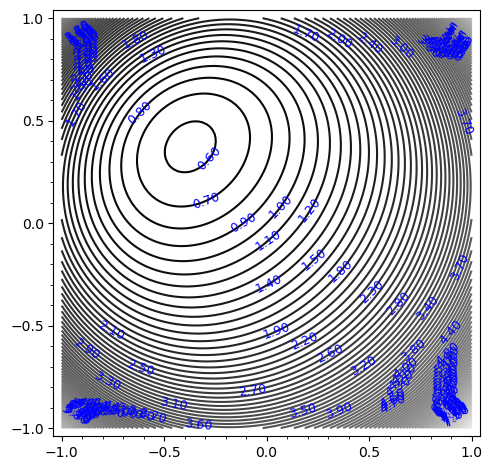

In [62]:
contour_plot(G(x,y),(x,-1,1),(y,-1,1),labels=true,fill=false,contours = [0.5, 0.6 .. 10])

In [63]:
F = G.diff()

In [71]:
v0 = vector(RDF,[-0.3,0.3])
v5 = NR(F,v0,5)
v5, F(*v5), G(*v5)

((-0.3765445824898374, 0.3765445824898374), (0.0, 0.0), 0.5747748470154905)

### c)

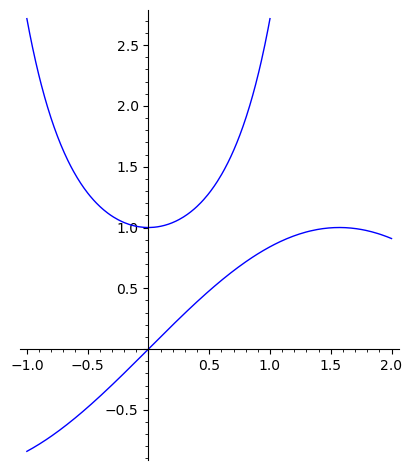

In [75]:
plot(exp(x^2),-1,1,aspect_ratio=1) + plot(sin(x),-1,2)

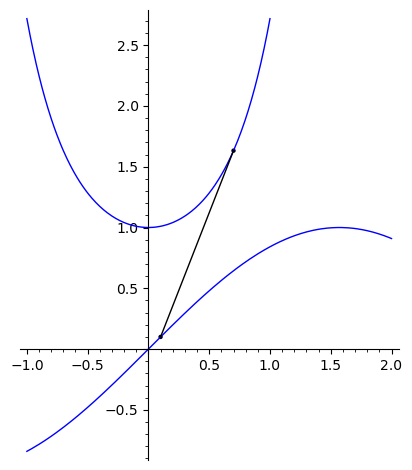

In [79]:
p1(x1) = [x1,exp(x1^2)]
p2(x2) = [x2,sin(x2)]
plot(exp(x^2),-1,1,aspect_ratio=1) + plot(sin(x),-1,2) \
+ point([p1(0.7),p2(0.1)],color='black')\
+ line([p1(0.7),p2(0.1)],color='black')

In [78]:
d(x1,x2) = (x2-x1)^2 + (sin(x2) - exp(x1^2))^2
d

(x1, x2) |--> (x1 - x2)^2 + (e^(x1^2) - sin(x2))^2

In [80]:
F = d.diff()

In [82]:
v0 = vector(RDF,[0.4,0.6])
v5 = NR(F,v0,5)
v5, F(*v5), d(*v5)

((0.33985340648358664, 0.7029682147028288),
 (-3.3306690738754696e-16, 2.220446049250313e-16),
 0.35838060649130393)

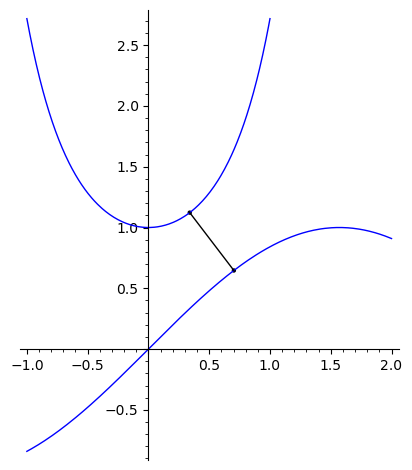

In [83]:
p1(x1) = [x1,exp(x1^2)]
p2(x2) = [x2,sin(x2)]
plot(exp(x^2),-1,1,aspect_ratio=1) + plot(sin(x),-1,2) \
+ point([p1(0.33985340648358664),p2(0.7029682147028288)],color='black')\
+ line([p1(0.33985340648358664),p2(0.7029682147028288)],color='black')

### e)
Calcular una tangente común a las curvas paramétricas 
$$t\to ((1+\sin(t))\cos(t),(1+\sin(t))\sin(t)),$$ $$t\to (3+\cos(t),2+\sin(t)),$$ 
con $t\in[0,2\pi]$.

In [4]:
c1(t) = ( (1+sin(t))*cos(t) , (1+sin(t))*sin(t) )
c2(t) = ( 3 + cos(t) , 2 + sin(t) )

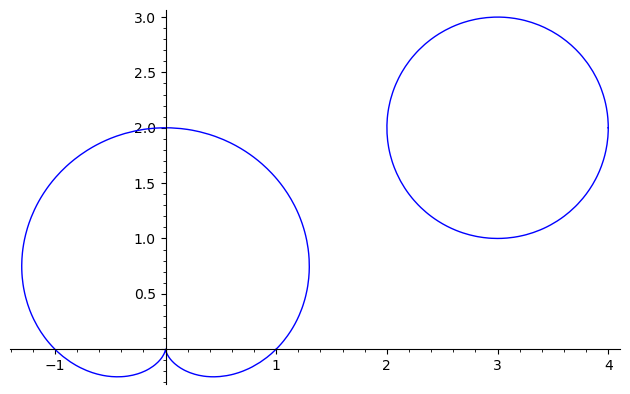

In [6]:
parametric_plot(c1(t),(t,0,2*pi)) + parametric_plot(c2(t),(t,0,2*pi))

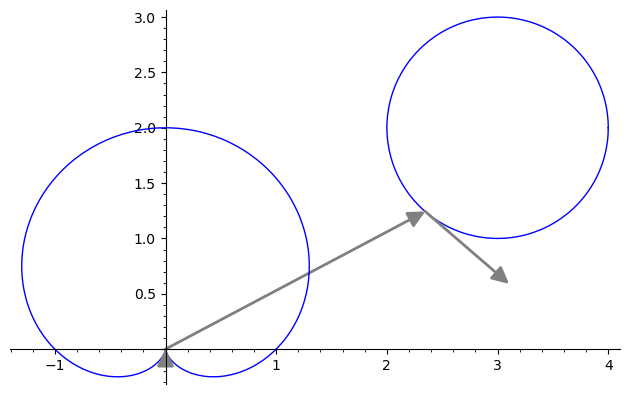

In [64]:
t1 = 3*pi.n()/2
t2 = 4.
arrow(c1(t1),c2(t2),color='gray') + parametric_plot(c1(t),(t,0,2*pi)) + parametric_plot(c2(t),(t,0,2*pi)) + \
arrow(c1(t1),vector(c1(t1)) + vector(c1.diff()(t1)),color='gray') + \
arrow(c2(t2),vector(c2(t2)) + vector(c2.diff()(t2)),color='gray')

In [26]:
var('t1,t2')
w = c2(t2) - c1(t1)
u1 = vector(c1.diff()(t1))
u2 = vector(c2.diff()(t2))
w,u1,u2

((-(sin(t1) + 1)*cos(t1) + cos(t2) + 3, -(sin(t1) + 1)*sin(t1) + sin(t2) + 2),
 (cos(t1)^2 - (sin(t1) + 1)*sin(t1), (sin(t1) + 1)*cos(t1) + cos(t1)*sin(t1)),
 (-sin(t2), cos(t2)))

In [27]:
# Para que w y u1 sean proporcionales, su producto vectorial ha de ser cero
eq1 = w[1]*u1[0] - w[0]*u1[1]

In [28]:
# Para que w y u2 sean proporcionales, su producto vectorial ha de ser cero
eq2 = w[1]*u2[0] - w[0]*u2[1]

In [29]:
F(t1,t2) = ( eq1 , eq2 )

In [33]:
def NR(F,v0,n):
    vn = vector(RDF,v0)
    DF = F.diff()
    for _ in range(n):
        vn = vector(RDF,vn + DF(*vn)\(-F(*vn)))
    return vn

In [42]:
t1,t2 = NR(F,vector(RDF,[1.8,3.3]),5)

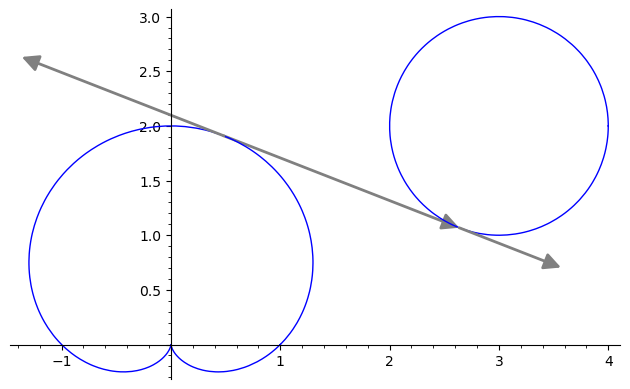

In [43]:
arrow(c1(t1),c2(t2),color='gray') + parametric_plot(c1(t),(t,0,2*pi)) + parametric_plot(c2(t),(t,0,2*pi)) + \
arrow(c1(t1),vector(c1(t1)) + vector(c1.diff()(t1)),color='gray') + \
arrow(c2(t2),vector(c2(t2)) + vector(c2.diff()(t2)),color='gray')

In [44]:
tangentes = []
for t1 in [0, 0.2 .. 2*pi]:
    for t2 in [0, 0.2 .. 2*pi]:
        tangentes += [ NR(F,vector(RDF,[t1,t2]),5)]
tangentes[:10]

[(-0.22776682179769434, -1.127048396085469),
 (-7.854862300563899, 23.8590184815249),
 (-2.033977198744047, -3.8363631083346994),
 (-2.3892240987477162, -13.794012046250964),
 (1.781818556037892, 14.453700285018561),
 (1.3226126003092824, 4.340111251239373),
 (4.712669259105747, 17.58562356334572),
 (0.2595353279480948, 2.7454974820931386),
 (0.2595353279522501, 2.74549748212072),
 (0.2595353279522501, 2.74549748212072)]

In [68]:
tangentes = [(t1,t2) for t1,t2 in tangentes if t1>0 and t2>0 and t1<2*pi and t2<2*pi and F(t1,t2).norm(2)<10^-7 and (t1-3*pi/2).abs()>0.1]
len(tangentes)

401

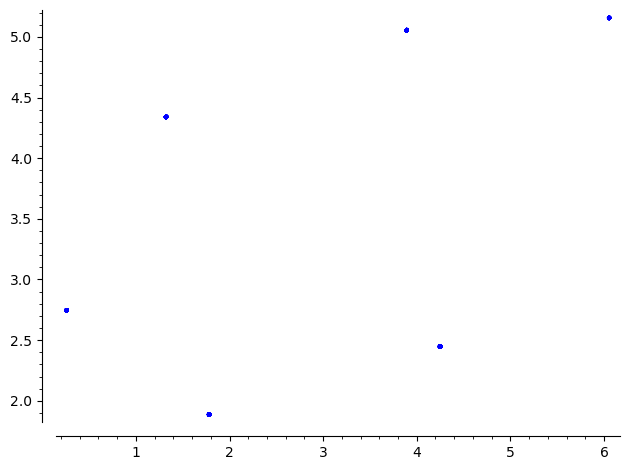

In [69]:
point(tangentes)

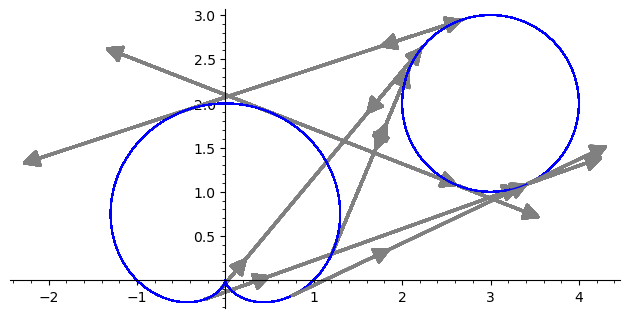

In [70]:
sum([arrow(c1(t1),c2(t2),color='gray') + parametric_plot(c1(t),(t,0,2*pi)) + parametric_plot(c2(t),(t,0,2*pi)) + \
arrow(c1(t1),vector(c1(t1)) + vector(c1.diff()(t1)),color='gray') + \
arrow(c2(t2),vector(c2(t2)) + vector(c2.diff()(t2)),color='gray') for t1,t2 in tangentes])